<IPython.core.display.Javascript object>


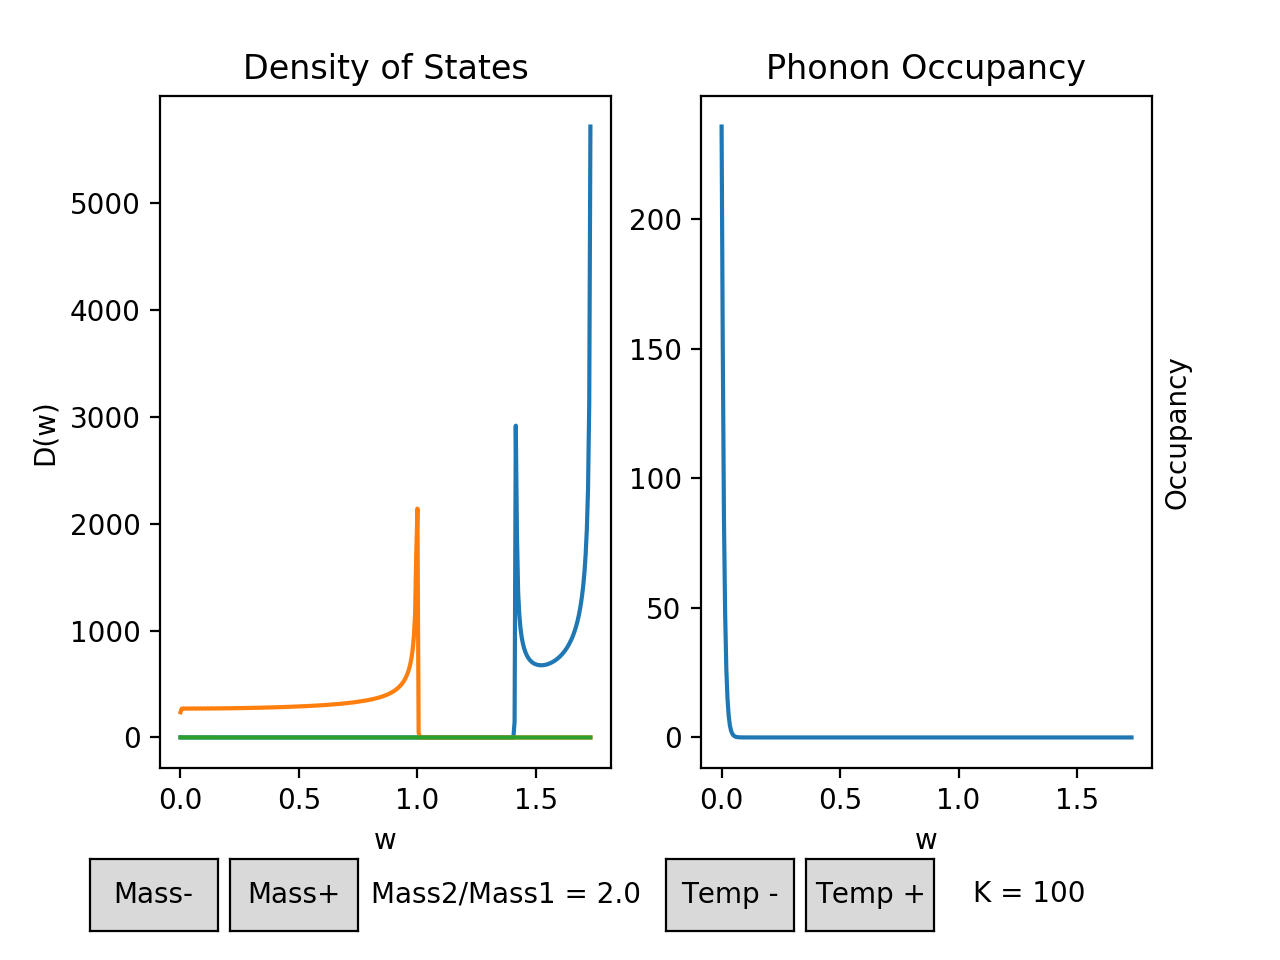

0

In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from IPython.display import HTML
import ipywidgets as widgets
from matplotlib.widgets import Button
from matplotlib.widgets import CheckButtons

import sympy as sp
import random



mass1 = 1
mass2 = 2
C = 1
k = 1

fig = plt.figure()
ax = fig.add_subplot(122)

ax2 = fig.add_subplot(121)


ax.set_title("Phonon Occupancy")
ax.set_xlabel("w")
ax.set_ylabel("Occupancy")

fig.subplots_adjust(bottom=0.2, top=0.90)


x = np.sqrt(2*C*((1/mass1)+(1/mass2)))+0.0001
c = 0.005
w = np.arange(0, x, c)

term1 = (C * (mass1 + mass2)) / (mass1 * mass2)
term2 = ((mass1 + mass2) ** 2) / ((mass1 ** 2) * (mass2 ** 2))

y = x/c
k = np.arange(0, np.pi, np.pi/y)


term3 = (4 * (np.sin(k / 2) ** 2)) / (mass1 * mass2)


w1 = np.sqrt(term1 + C * np.sqrt(term2 - term3))
w2 = np.sqrt(term1 - C * np.sqrt(term2 - term3))

axprev = fig.add_axes([0.52, 0.03, 0.1, 0.075])
axnext = fig.add_axes([0.63, 0.03, 0.1, 0.075])
bnext = Button(axnext, 'Temp +')
bprev = Button(axprev, 'Temp -')

axprevmass = fig.add_axes([0.07, 0.03, 0.1, 0.075])
axnextmass = fig.add_axes([0.18, 0.03, 0.1, 0.075])
bnextmass = Button(axnextmass, 'Mass+')
bprevmass = Button(axprevmass, 'Mass-')

def gauss(w, w1):
    return (np.exp(-((w - w1) ** 2) / (2 * (0.002 ** 2)))) / (np.sqrt(2 * np.pi) * 0.002)

dos = np.zeros(len(w))
dos2 = np.zeros(len(w))

for i in range(len(w)):
    for j in range(len(k)):
        term3 = (4 * (np.sin(k[j] / 2) ** 2)) / (mass1 * mass2)
        w1 = np.sqrt(term1 + C * np.sqrt(term2 - term3))
        w2 = np.sqrt(term1 - C * np.sqrt(term2 - term3))
        y = gauss(w[i], w1)
        dos[i] += gauss(w[i], w1)
        dos2[i] += gauss(w[i], w2)


boltz = 8.617333262145 * (10 ** -5)
p = np.zeros(len(dos))
p2 = np.zeros(len(dos))
t = 100

ax3 = fig.add_axes([0.75, 0.03, 0.1, 0.075])
ax3.tick_params("both", color='w')
ax3.spines["left"].set_color("w")
ax3.spines["right"].set_color("w")
ax3.spines["top"].set_color("w")
ax3.spines["bottom"].set_color("w")
ax3.yaxis.label.set_color('w')
ax3.xaxis.label.set_color('w')
ax3.set_yticklabels([])
ax3.set_xticklabels([])
ax3.text(x=0.1, y=0.4, s="K = " + str(t))

ax4 = fig.add_axes([0.29, 0.03, 0.1, 0.075])
ax4.tick_params("both", color='w')
ax4.spines["left"].set_color("w")
ax4.spines["right"].set_color("w")
ax4.spines["top"].set_color("w")
ax4.spines["bottom"].set_color("w")
ax4.yaxis.label.set_color('w')
ax4.xaxis.label.set_color('w')
ax4.set_yticklabels([])
ax4.set_xticklabels([])
ax4.text(x=0, y=0.4, s="Mass2/Mass1 = " + str(mass2/mass1))

ax2.set_title("Density of States")
ax2.set_xlabel("w")
ax2.set_ylabel("D(w)")


def boltzman(w, boltz):
    return np.exp((-w)/(boltz*t))

ax2.plot(w, dos)
ax2.plot(w, dos2)
ax2.plot(w, boltzman(w, boltz))

for i in range(len(w)):
    p[i] = (dos[i] * boltzman(w[i], boltz)) + (dos2[i] * boltzman(w[i], boltz))

ax.yaxis.set_label_position("right")
ax.plot(w, p)

class Index():

    def next(self, event):
        global t
        ax.cla()
        ax3.cla()
        t += 25

        boltz = 8.617333262145 * (10 ** -5)
        p = np.zeros(len(dos))
        p2 = np.zeros(len(dos))

        ax.set_title("Phonon Occupancy")
        ax.set_xlabel("w")
        ax.set_ylabel("Occupancy")
        ax.yaxis.set_label_position("right")

        for i in range(len(w)):
            p[i] = (dos[i] * boltzman(w[i], boltz)) + (dos2[i] * boltzman(w[i], boltz))

        ax3.set_yticklabels([])
        ax3.set_xticklabels([])
        ax3.text(x=0.1, y=0.4, s="K = " + str(t))

        ax.plot(w, p)

    def prev(self, event):
        global t
        ax.cla()
        ax3.cla()
        t -= 25

        boltz = 8.617333262145 * (10 ** -5)
        p = np.zeros(len(dos))
        p2 = np.zeros(len(dos))

        ax.set_title("Phonon Occupancy")
        ax.set_xlabel("w")
        ax.set_ylabel("Occupancy")
        ax.yaxis.set_label_position("right")

        ax3.set_yticklabels([])
        ax3.set_xticklabels([])
        ax3.text(x=0.1, y=0.4, s="K = " + str(t))

        for i in range(len(w)):
            p[i] = (dos[i] * boltzman(w[i], boltz)) + (dos2[i] * boltzman(w[i], boltz))

        ax.plot(w, p)

    def nextmass(self, event):
        global mass2
        ax.cla()
        ax3.cla()
        ax2.cla()
        ax4.cla()
        mass2 += 0.25

        dos = np.zeros(len(w))
        dos2 = np.zeros(len(w))

        for i in range(len(w)):
            for j in range(len(k)):
                term3 = (4 * (np.sin(k[j] / 2) ** 2)) / (mass1 * mass2)
                w1 = np.sqrt(term1 + C * np.sqrt(term2 - term3))
                w2 = np.sqrt(term1 - C * np.sqrt(term2 - term3))
                y = gauss(w[i], w1)
                dos[i] += gauss(w[i], w1)
                dos2[i] += gauss(w[i], w2)

        boltz = 8.617333262145 * (10 ** -5)
        p = np.zeros(len(dos))
        p2 = np.zeros(len(dos))

        ax.set_title("Phonon Occupancy")
        ax.set_xlabel("w")
        ax.set_ylabel("Occupancy")
        ax.yaxis.set_label_position("right")

        ax2.set_title("Density of States")
        ax2.set_xlabel("w")
        ax2.set_ylabel("D(w)")

        ax3.set_yticklabels([])
        ax3.set_xticklabels([])
        ax3.text(x=0.1, y=0.4, s="K = " + str(t))

        ax4.set_yticklabels([])
        ax4.set_xticklabels([])
        ax4.text(x=0, y=0.4, s="Mass2/Mass1 = " + str(mass2/mass1))


        for i in range(len(w)):
            p[i] = (dos[i] * boltzman(w[i], boltz)) + (dos2[i] * boltzman(w[i], boltz))

        ax.plot(w, p)
        ax2.plot(w, dos)
        ax2.plot(w, dos2)
        ax2.plot(w, boltzman(w, boltz))

    def prevmass(self, event):
        global mass2
        mass2 -= 0.25
        ax.cla()
        ax3.cla()
        ax2.cla()
        ax4.cla()

        dos = np.zeros(len(w))
        dos2 = np.zeros(len(w))

        for i in range(len(w)):
            for j in range(len(k)):
                term3 = (4 * (np.sin(k[j] / 2) ** 2)) / (mass1 * mass2)
                w1 = np.sqrt(term1 + C * np.sqrt(term2 - term3))
                w2 = np.sqrt(term1 - C * np.sqrt(term2 - term3))
                y = gauss(w[i], w1)
                dos[i] += gauss(w[i], w1)
                dos2[i] += gauss(w[i], w2)

        boltz = 8.617333262145 * (10 ** -5)
        p = np.zeros(len(dos))
        p2 = np.zeros(len(dos))

        ax.set_title("Phonon Occupancy")
        ax.set_xlabel("w")
        ax.set_ylabel("Occupancy")
        ax.yaxis.set_label_position("right")

        ax2.set_title("Density of States")
        ax2.set_xlabel("w")
        ax2.set_ylabel("D(w)")

        ax3.set_yticklabels([])
        ax3.set_xticklabels([])
        ax3.text(x=0.1, y=0.4, s="K = " + str(t))

        ax4.set_yticklabels([])
        ax4.set_xticklabels([])
        ax4.text(x=0, y=0.4, s="Mass2/Mass1 = " + str(mass2/mass1))

        for i in range(len(w)):
            p[i] = (dos[i] * boltzman(w[i], boltz)) + (dos2[i] * boltzman(w[i], boltz))

        ax.plot(w, p)
        ax2.plot(w, dos)
        ax2.plot(w, dos2)
        ax2.plot(w, boltzman(w, boltz))




callback = Index()
bnext.on_clicked(callback.next)
bprev.on_clicked(callback.prev)
bnextmass.on_clicked(callback.nextmass)
bprevmass.on_clicked(callback.prevmass)